In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e69addd407bab02fd236850ec4eb8297


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | baillif
Processing Record 2 of Set 12 | coquimbo
Processing Record 3 of Set 12 | angoche
Processing Record 4 of Set 12 | lodja
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | warqla
City not found. Skipping...
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | mitsamiouli
Processing Record 9 of Set 12 | saint george
Processing Record 10 of Set 12 | peterhead
Processing Record 11 of Set 12 | lompoc
Processing Record 12 of Set 12 | talnakh
Processing Record 13 of Set 12 | capoeiras
Processing Record 14 of Set 12 | tiksi
Processing Record 15 of Set 12 | bluff
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | luang prabang
Processing Record 18 of Set 12 | busselton
Processing Record 19 of Set 12 | venice
Processing Record 20 of Set 12 | atuona
Processing Record 21 of Set 12 | lagoa
Processing Record 22 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 23 of Set 12 

Processing Record 33 of Set 15 | bar harbor
Processing Record 34 of Set 15 | auki
Processing Record 35 of Set 15 | salalah
Processing Record 36 of Set 15 | san carlos de bariloche
Processing Record 37 of Set 15 | whitehorse
Processing Record 38 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 15 | hay river
Processing Record 40 of Set 15 | jerantut
Processing Record 41 of Set 15 | constitucion
Processing Record 42 of Set 15 | saint-georges
Processing Record 43 of Set 15 | ormara
Processing Record 44 of Set 15 | gerash
Processing Record 45 of Set 15 | acapulco
Processing Record 46 of Set 15 | san rafael
Processing Record 47 of Set 15 | montrose
Processing Record 48 of Set 15 | beloha
Processing Record 49 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 15 | ventspils
Processing Record 1 of Set 16 | victoria
Processing Record 2 of Set 16 | krasnoselkup
Processing Record 3 of Set 16 | alexandria
Processing Record 4 of Set 16 |

Processing Record 17 of Set 19 | coahuayana
Processing Record 18 of Set 19 | valparaiso
Processing Record 19 of Set 19 | huntington
Processing Record 20 of Set 19 | yenagoa
Processing Record 21 of Set 19 | privodino
Processing Record 22 of Set 19 | raga
Processing Record 23 of Set 19 | pudozh
Processing Record 24 of Set 19 | aguimes
Processing Record 25 of Set 19 | ntungamo
Processing Record 26 of Set 19 | manaure
Processing Record 27 of Set 19 | lasa
Processing Record 28 of Set 19 | catamarca
Processing Record 29 of Set 19 | udachnyy
Processing Record 30 of Set 19 | raudeberg
Processing Record 31 of Set 19 | caucaia
Processing Record 32 of Set 19 | alice springs
Processing Record 33 of Set 19 | punta alta
Processing Record 34 of Set 19 | saint-joseph
Processing Record 35 of Set 19 | roseland
Processing Record 36 of Set 19 | isangel
Processing Record 37 of Set 19 | mus
Processing Record 38 of Set 19 | berezovyy
Processing Record 39 of Set 19 | shaunavon
Processing Record 40 of Set 19 |

Processing Record 3 of Set 23 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 23 | vartej
Processing Record 5 of Set 23 | magna
Processing Record 6 of Set 23 | bundaberg
Processing Record 7 of Set 23 | tessalit
Processing Record 8 of Set 23 | balimo
City not found. Skipping...
Processing Record 9 of Set 23 | morant bay
Processing Record 10 of Set 23 | hohhot
Processing Record 11 of Set 23 | oktyabrskoye
Processing Record 12 of Set 23 | pochutla
Processing Record 13 of Set 23 | bassano
Processing Record 14 of Set 23 | semypolky
Processing Record 15 of Set 23 | tarudant
City not found. Skipping...
Processing Record 16 of Set 23 | sinazongwe
Processing Record 17 of Set 23 | kaeo
Processing Record 18 of Set 23 | vestmanna
Processing Record 19 of Set 23 | amapa
Processing Record 20 of Set 23 | northam
Processing Record 21 of Set 23 | imbituba
Processing Record 22 of Set 23 | zlitan
Processing Record 23 of Set 23 | boyolangu
Processing Record 24 of Set 23 | smila
Processing

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baillif,16.0202,-61.7463,74.64,76,59,9.06,GP,2021-12-12 09:45:55
1,Coquimbo,-29.9533,-71.3436,56.93,82,0,3.44,CL,2021-12-12 09:43:16
2,Angoche,-16.2325,39.9086,88.90,59,51,16.75,MZ,2021-12-12 09:45:55
3,Lodja,-3.4833,23.4333,72.16,95,100,3.69,CD,2021-12-12 09:45:56
4,Ushuaia,-54.8000,-68.3000,47.86,87,75,10.36,AR,2021-12-12 09:45:56
5,Rikitea,-23.1203,-134.9692,75.69,80,57,10.31,PF,2021-12-12 09:45:56
6,Mitsamiouli,-11.3847,43.2844,91.69,46,20,18.41,KM,2021-12-12 09:45:56
7,Saint George,37.1041,-113.5841,40.35,57,1,5.75,US,2021-12-12 09:45:57
8,Peterhead,57.5058,-1.7981,45.00,80,98,11.03,GB,2021-12-12 09:45:57
9,Lompoc,34.6391,-120.4579,51.93,83,1,5.75,US,2021-12-12 09:45:57


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baillif,GP,2021-12-12 09:45:55,16.0202,-61.7463,74.64,76,59,9.06
1,Coquimbo,CL,2021-12-12 09:43:16,-29.9533,-71.3436,56.93,82,0,3.44
2,Angoche,MZ,2021-12-12 09:45:55,-16.2325,39.9086,88.90,59,51,16.75
3,Lodja,CD,2021-12-12 09:45:56,-3.4833,23.4333,72.16,95,100,3.69
4,Ushuaia,AR,2021-12-12 09:45:56,-54.8000,-68.3000,47.86,87,75,10.36
5,Rikitea,PF,2021-12-12 09:45:56,-23.1203,-134.9692,75.69,80,57,10.31
6,Mitsamiouli,KM,2021-12-12 09:45:56,-11.3847,43.2844,91.69,46,20,18.41
7,Saint George,US,2021-12-12 09:45:57,37.1041,-113.5841,40.35,57,1,5.75
8,Peterhead,GB,2021-12-12 09:45:57,57.5058,-1.7981,45.00,80,98,11.03
9,Lompoc,US,2021-12-12 09:45:57,34.6391,-120.4579,51.93,83,1,5.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

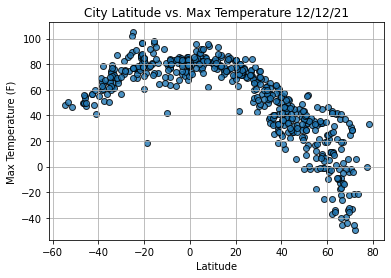

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

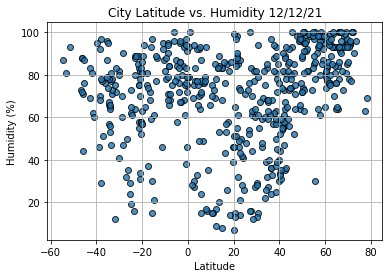

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

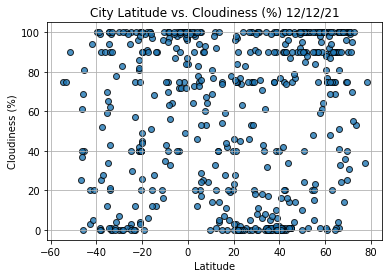

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

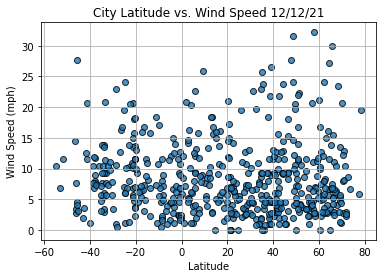

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()